<a href="https://colab.research.google.com/github/choijuhe/jh/blob/main/12_14_number_simplenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)
[Epoch 1, Batch 100] Loss: 1.410
[Epoch 1, Batch 200] Loss: 0.880
[Epoch 1, Batch 300] Loss: 0.682
[Epoch 1, Batch 400] Loss: 0.553
[Epoch 1, Batch 500] Loss: 0.474
[Epoch 1, Batch 600] Loss: 0.397
[Epoch 1, Batch 700] Loss: 0.340
[Epoch 1, Batch 800] Loss: 0.305
[Epoch 1, Batch 900] Loss: 0.268
[Epoch 2, Batch 100] Loss: 0.222
[Epoch 2, B

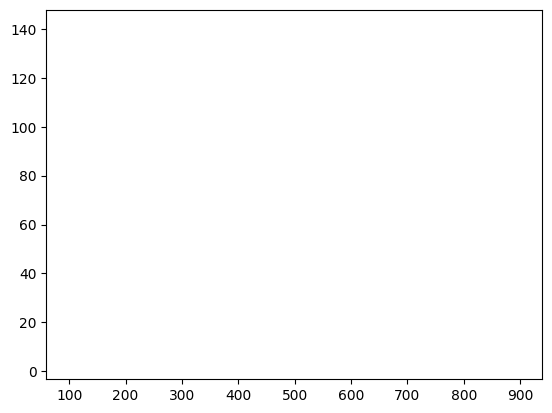

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize((0.5,), (0.5,))  # 평균과 표준편차를 사용하여 정규화
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# 신경망 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            torch.nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            torch.nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64),
            torch.nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )
        # 28 * 28 => ? => 10

    def forward(self, x):
         x = self.flatten(x)
         x = self.linear_relu_stack(x)
        # 활성화 함수는 relu 사용
         return x

model = SimpleNN()

print(model)
############### Your code here!!!
# 손실 함수와 옵티마이저 설정
#criterion = ??
#optimizer = ??
learning_rate = 1e-4
batch_size = 64
num_epochs = 5

loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# 학습
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# num_epochs = ??
running_loss_list =[]
epo_list = []
j = 1
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:

            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
            running_loss_list.append(running_loss/100)
            epo_list.append(j)
            j+=1
            plt.plot(i, running_loss)
            running_loss = 0.0

print("Finished Training")

# 모델 저장
torch.save(model.state_dict(), 'mnist_simple_nn.pth')

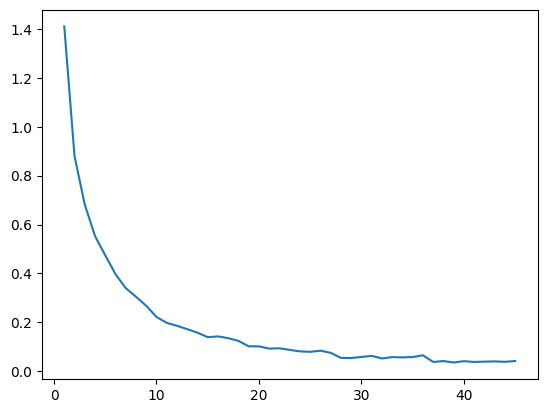

In [33]:
plt.plot(epo_list,running_loss_list)

Test Error: 
 Accuracy: 6300.0%, Avg loss: 0.033856 

Test Error: 
 Accuracy: 6300.6%, Avg loss: 0.034071 

Test Error: 
 Accuracy: 6300.6%, Avg loss: 0.034073 

Test Error: 
 Accuracy: 6300.6%, Avg loss: 0.034073 

Test Error: 
 Accuracy: 6300.6%, Avg loss: 0.034073 



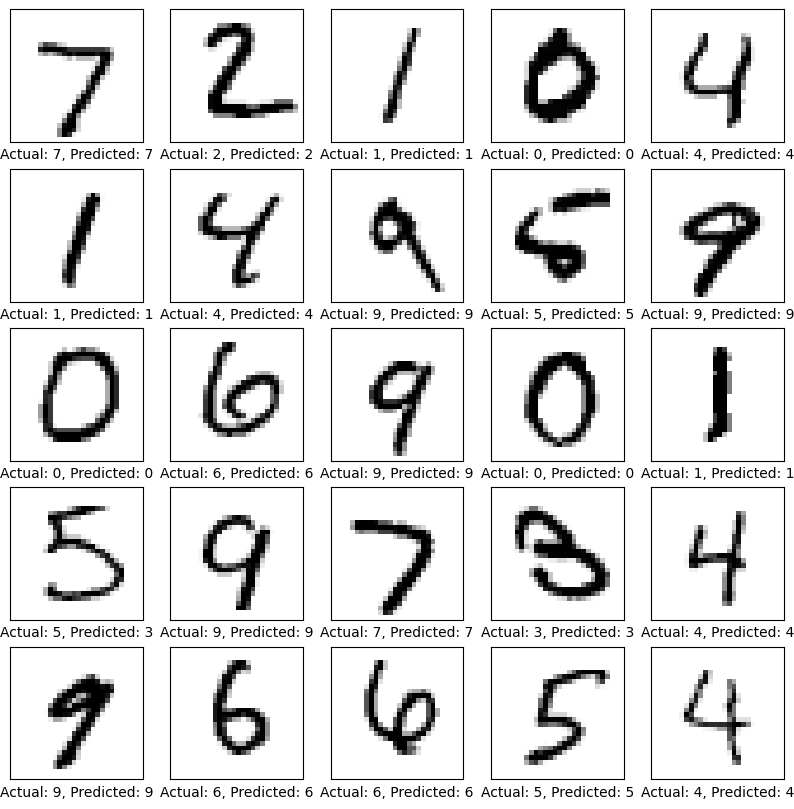

In [34]:
import matplotlib.pyplot as plt

# 학습 완료 후 테스트 데이터로 예측 수행
model.eval()
test_images, test_labels = next(iter(testloader))
test_images, test_labels = test_images.to(device), test_labels.to(device)
test_loss, correct = 0, 0
size = len(testloader.dataset)
num_batches = len(testloader)

for epoch in range(num_epochs):
  with torch.no_grad():
      test_outputs = model(test_images)
      correct /= size
      test_loss /= num_batches
      test_loss += loss_fn(test_outputs, test_labels).item()
      correct += (test_outputs.argmax(1) == test_labels).type(torch.float).sum().item()
      print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
softmax = nn.Softmax(dim=1)
probabilities = softmax(test_outputs)
predicted_classes = torch.argmax(probabilities, dim=1)

# 이미지 및 예측 시각화
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].cpu().numpy().squeeze(), cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {test_labels[i]}, Predicted: {predicted_classes[i]}')
plt.show()